In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [5]:
def load_object_from_pkl(filename):
    """
    Load an object from a .pkl file using pickle.
    
    Parameters:
        filename (str): The name of the .pkl file.
    
    Returns:
        object: The loaded object from the .pkl file.
    """
    with open(filename, 'rb') as f:
        obj = pickle.load(f)
    print(f"Object loaded from {filename}")
    return obj

In [7]:
def omega_p(t,tau,T,A,a):
    return A*np.exp(-(t-tau)**2/(T**2))*a

def omega_s(t,tau,T,A,a):
    return A*np.exp(-(t+tau)**2/(T**2))+A*np.exp(-(t-tau)**2/T**2)*a

def create_pulse(_time_array, _pulse_fct, _pulse_amp):
    """
    Creates an array of amplitudes for a laser pulse
    Args:
        _time_array: array of time points over which to calculate the laser amplitude
        _pulse_fct: function governing the laser amplitude at each time step
        _pulse_amp: float scaling the overall amplitude of the pulse
    Returns:
        pulse_array: array of laser amplitudes
    """
    pulse_array = np.zeros(len(_time_array))
    for i in range(len(_time_array)):
        pulse_array[i] = _pulse_amp*_pulse_fct(_time_array[i],_time_array[-1])

    return pulse_array

def create_masked(time_array, pump_amp, stokes_amp, a, n, c):
    """
    Creates a pair of optimal pulses overlaid with a Gaussian mask
    Args:
        time_array: array of time points over which to calculate the laser amplitude
        pump_amp: amplitude of the first laser
        stokes_amp: amplitude of the second laser
        a: determines symmetry/asymmetry of pulses, optimise this parameter
        n: power that the exponent is raised to, makes the pulse more spiky 
        c: standard deviation of gaussian to ensure pulse starts at zero
    Returns:
        pump_array: array of amplitudes of the first laser
        stokes_array: array of amplitudes of the second laser
    """

    pump_fct = lambda t, T: np.exp(-((t - (T/2))/c)**(2*n))*np.sin(np.pi/2*(1/(1 + np.exp((-a*(t - T/2))/T))))
    stokes_fct = lambda t, T: np.exp(-((t - (T/2))/c)**(2*n))*np.cos(np.pi/2*(1/(1 + np.exp((-a*(t - T/2))/T))))

    pump_array = create_pulse(time_array,pump_fct,pump_amp)
    stokes_array = create_pulse(time_array,stokes_fct,stokes_amp)

    return (pump_array, stokes_array)

/var/folders/t7/7ztd24f11m79mgqy8dd_m8r40000gn/T/ipykernel_11131/4089580643.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


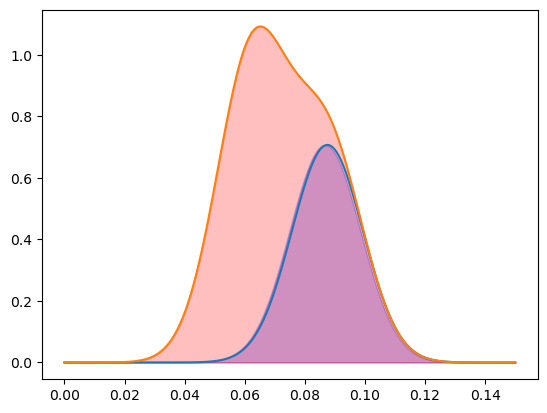

In [3]:
fig, ax = plt.subplots()
t = np.linspace(0,0.15,1000)
ax.plot(t, omega_p(t-0.15/2,0.75*0.05/3,0.05/3,1,1/np.sqrt(2)))
ax.fill_between(t,  omega_p(t-0.15/2,0.7*0.05/3,0.05/3,1,1/np.sqrt(2)), color='blue', alpha=0.25,  label='$\Omega_P$')
ax.plot(t, omega_s(t-0.15/2,0.75*0.05/3,0.05/3,1,1/np.sqrt(2)))
ax.fill_between(t, omega_s(t-0.15/2,0.75*0.05/3,0.05/3,1,1/np.sqrt(2)), color='red', alpha=0.25,  label='$\Omega_S$')

#ax.legend(fontsize=18)
fig.show()

fig.savefig('f_stirap.pdf')

Object loaded from pulse_chirps/fstirap_chirp.pkl


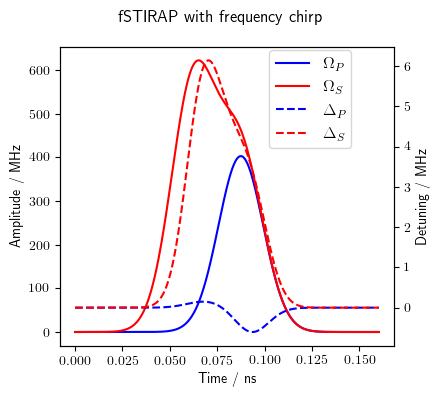

In [26]:
chirp_fstirap=load_object_from_pkl('pulse_chirps/fstirap_chirp.pkl')
chirp_pump=chirp_fstirap[0]
chirp_stokes=chirp_fstirap[1]
t_chirp=chirp_fstirap[2]
t = np.linspace(0,0.1603,1000)

# Create figure and axis objects
plt.rcParams['text.usetex'] = True
fig, ax1 = plt.subplots(figsize=(4.5, 4))

# Duplicate the axis
ax2 = ax1.twinx()

# Plot the data
ax1.plot(t, 570*omega_p(t-0.15/2,0.75*0.05/3,0.05/3,1,1/np.sqrt(2)), label='$\Omega_P$', color='b')
ax1.plot(t, 570*omega_s(t-0.15/2,0.75*0.05/3,0.05/3,1,1/np.sqrt(2)), label='$\Omega_S$', color='r')
ax2.plot(t_chirp, chirp_pump, linestyle='--', color='b', label='$\Delta_P$')
ax2.plot(t_chirp, chirp_stokes, linestyle='--', color='r', label='$\Delta_S$')

fig.legend(loc='upper center', bbox_to_anchor=(0.7, 0.9), ncol=1, fontsize=12)

# Set labels and title
ax1.set_xlabel('Time / ns')
ax1.set_ylabel('Amplitude / MHz')
ax2.set_ylabel('Detuning / MHz')
fig.suptitle('fSTIRAP with frequency chirp')
fig.tight_layout()
fig.savefig('f_stirap_with_chirp.pdf')


In [27]:
time_list=np.linspace(0,0.25,1000)
pump, stokes = create_masked(time_list,1,1,14,6,0.25/3)

/var/folders/t7/7ztd24f11m79mgqy8dd_m8r40000gn/T/ipykernel_87805/1304814366.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


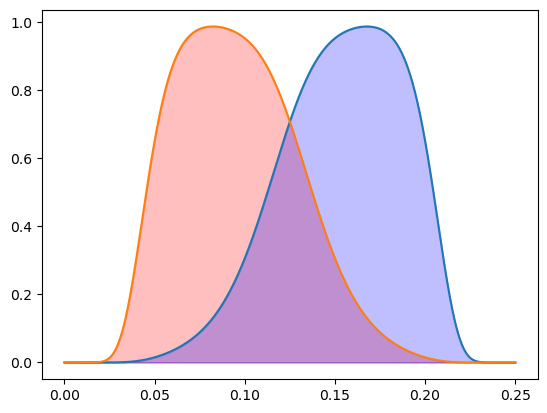

In [49]:
fig, ax = plt.subplots()
ax.plot(time_list,pump)
ax.fill_between(time_list, stokes, color='red', alpha=0.25,  label='$\Omega_S$')
ax.plot(time_list,stokes)
ax.fill_between(time_list,  pump, color='blue', alpha=0.25,  label='$\Omega_P$')


#ax.legend(fontsize=18, loc='upper right')
fig.show()
fig.savefig('stirap_masked.pdf')

Object loaded from pulse_chirps/rot_3_chirp.pkl
Object loaded from pulse_chirps/rot_4_chirp.pkl


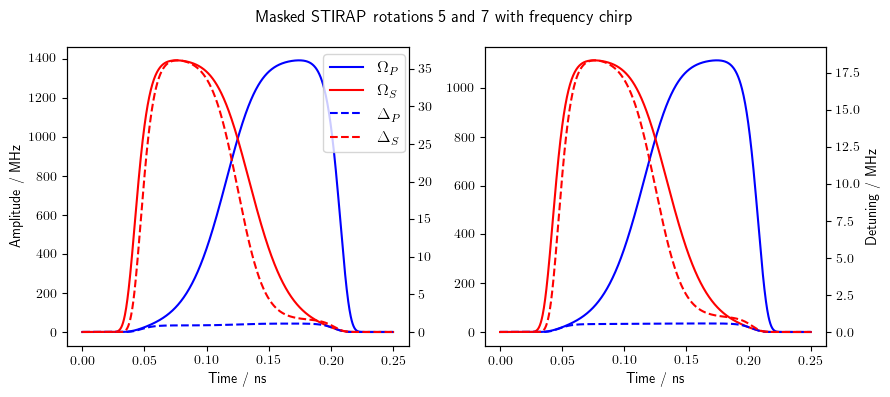

In [43]:
chirp_3=load_object_from_pkl('pulse_chirps/rot_3_chirp.pkl')
chirp_pump_3=chirp_3[0]
chirp_stokes_3=chirp_3[1]
t_chirp_3=chirp_3[2]
t = np.linspace(0,0.25,1000)
chirp_4=load_object_from_pkl('pulse_chirps/rot_4_chirp.pkl')
chirp_pump_4=chirp_4[0]
chirp_stokes_4=chirp_4[1]
t_chirp_4=chirp_4[2]

# Create figure and axis objects
plt.rcParams['text.usetex'] = True
# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Duplicate the axis
axs1 = axs[0].twinx()
axs2 = axs[1].twinx()

# Plot the data
axs[0].plot(t, 1400*pump, label='$\Omega_P$', color='b')
axs[0].plot(t, 1400*stokes, label='$\Omega_S$', color='r')
axs1.plot(t_chirp_3, chirp_pump_3, linestyle='--', color='b', label='$\Delta_P$')
axs1.plot(t_chirp_3, chirp_stokes_3, linestyle='--', color='r', label='$\Delta_S$')

axs[1].plot(t, 1120*pump, color='b')
axs[1].plot(t, 1120*stokes, color='r')
axs2.plot(t_chirp_4, chirp_pump_4, linestyle='--', color='b')
axs2.plot(t_chirp_4, chirp_stokes_4, linestyle='--', color='r')

fig.legend(loc='upper center', bbox_to_anchor=(0.41, 0.89), ncol=1, fontsize=12)

# Set labels and title
axs[0].set_xlabel('Time / ns')
axs[1].set_xlabel('Time / ns')
axs[0].set_ylabel('Amplitude / MHz')
axs2.set_ylabel('Detuning / MHz')
fig.suptitle('Masked STIRAP rotations 5 and 7 with frequency chirp')
fig.tight_layout()
fig.savefig('rots3_4_withchirp.pdf')